# Violence Case Analysis for all Countries

# Setup

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Parameters

In [2]:
ALL_COUNTRIES_DATASET = "../../../data/RQ2/processed/all_countries_df.csv"

## Configuration

In [3]:
%matplotlib inline

# Loading the Datasets

In [4]:
df = pd.read_csv(ALL_COUNTRIES_DATASET)

In [5]:
df.head()

,country,measure,location,sex,age_sort,age,cause,year,val
0,United Kingdom,YLLs (Years of Life Lost),Wigan,Male,0,1 to 4,Diabetes mellitus,2010,2.403586
1,United Kingdom,YLLs (Years of Life Lost),Wigan,Female,0,1 to 4,Diabetes mellitus,2010,3.287731
2,United Kingdom,YLLs (Years of Life Lost),Wigan,Male,1,5 to 9,Diabetes mellitus,2010,1.983731
3,United Kingdom,YLLs (Years of Life Lost),Wigan,Female,1,5 to 9,Diabetes mellitus,2010,2.037679
4,United Kingdom,YLLs (Years of Life Lost),Wigan,Male,2,10 to 14,Diabetes mellitus,2010,2.203710


In [6]:
df.shape

(898320, 9)

### Calculate overall diabetes average

In [7]:
overall_diabetes_death_avg = df[df['measure'].str.contains('Deaths') &
                 df['cause'].str.contains('Diabetes')]
overall_diabetes_death_avg = overall_diabetes_death_avg['val'].mean()
overall_diabetes_death_avg  

81.53446507858087

### Create table of demographs with homicide rate higher than diabetes average

In [8]:
#get rows with higher homicide rate than overall_diabetes_avg
high_violence_death_rate_demos = df[df['measure'].str.contains('Deaths') &
                  df['cause'].str.contains('Interpersonal violence')]

high_violence_death_rate_demos = high_violence_death_rate_demos[high_violence_death_rate_demos['val'] > overall_diabetes_death_avg]
high_violence_death_rate_demos = high_violence_death_rate_demos.sort_values(by=['val'], ascending=False)
high_violence_death_rate_demos.shape

(1827, 9)

In [9]:
high_violence_death_rate_demos.head()

,country,measure,location,sex,age_sort,age,cause,year,val
457900,Brazil,Deaths,Alagoas,Male,2,20 to 24,Interpersonal violence,2011,390.170354
456452,Brazil,Deaths,Alagoas,Male,2,20 to 24,Interpersonal violence,2010,378.401649
460141,Brazil,Deaths,Alagoas,Male,2,20 to 24,Interpersonal violence,2012,359.100583
459878,Brazil,Deaths,Alagoas,Male,2,20 to 24,Interpersonal violence,2013,349.784489
677512,Kenya,Deaths,TanaRiver,Male,2,20 to 24,Interpersonal violence,2012,337.222488


## Death Rate exploration

### Gender

In [10]:
gender = high_violence_death_rate_demos.groupby(['sex'], as_index=False).agg({'val':'mean'})

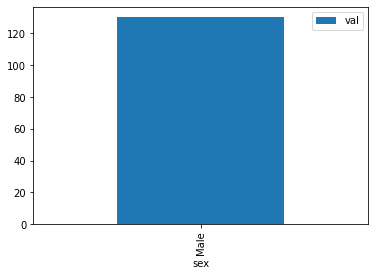

In [11]:
gender.plot(x="sex", y="val", kind="bar")
plt.show()

### Age

In [12]:
age = high_violence_death_rate_demos.groupby(['age'], as_index=False).agg({'val':'mean'})

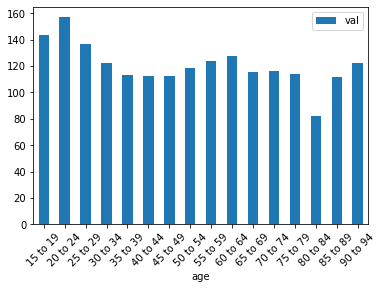

In [13]:
age.plot(x="age", y="val", kind="bar")
plt.xticks(rotation=45)
plt.show()

### Locations

In [14]:
high_violence_location_demos = high_violence_death_rate_demos.groupby(['location', 'year'], as_index=False).agg({'year': 'count', 'val':'mean'})
high_violence_location_demos
#38 demos in each region (for one year)

,location,year,val
0,Acre,3,88.807503
1,Acre,2,88.358700
2,Acre,3,100.669284
3,Acre,3,104.184262
4,Acre,3,104.801031
...,...,...,...
377,Veracruz de Ignacio de la Llave,1,82.312354
378,Zacatecas,3,94.366223
379,Zacatecas,5,109.399741
380,Zacatecas,5,107.065326


In [15]:
location_by_year_frequency = high_violence_location_demos.groupby('location').count()
location_by_year_frequency['val'].describe()

count    49.000000
mean      7.795918
std       3.142316
min       1.000000
25%       5.000000
50%      10.000000
75%      10.000000
max      10.000000
Name: val, dtype: float64

In [16]:
#count of all unique locations from all countries
df.location.nunique()

394

We can see average is 7 - so locations sustaining over diabetes average deaths rates likely to keep doing so

In [17]:
location_by_year_frequency

,year,val
location,,
Acre,10,10
Alagoas,10,10
Amapá,10,10
Amazonas,10,10
Bahia,10,10
Baja California,9,9
Baja California Sur,4,4
Ceará,10,10
Chihuahua,10,10


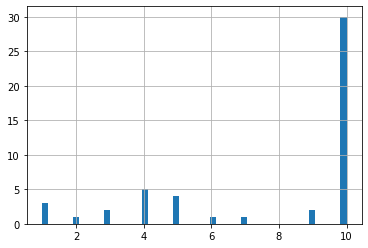

In [18]:
# Shows that then vast majority of regions that have a high violence demograph tend to consistently have one 
location_by_year_frequency['val'].hist(bins=49)
plt.show()

## High Violence Demographs by Country

In [19]:
country_filter = high_violence_death_rate_demos.groupby('country').count()['val']
country_filter

country
America       3
Brazil     1123
Kenya        37
Mexico      664
Name: val, dtype: int64

So the UK, Japan, and Indonesia don't have any internal region with crime rate over the overall diabetes average

In [20]:
location_filter = high_violence_death_rate_demos.groupby('location', as_index=False).count()
location_filter = location_filter[['location', 'val']]
location_filter

,location,val
0,Acre,40
1,Alagoas,80
2,Amapá,47
3,Amazonas,51
4,Bahia,57
5,Baja California,47
6,Baja California Sur,13
7,Ceará,59
8,Chihuahua,86
9,Colima,55


In [21]:
gender_filter = high_violence_death_rate_demos.groupby('sex', as_index=False).count()
gender_filter

,sex,country,measure,location,age_sort,age,cause,year,val
0,Male,1827,1827,1827,1827,1827,1827,1827,1827


In [22]:
age_filter = high_violence_death_rate_demos.groupby('age', as_index=False).count()
age_filter = age_filter[['age', 'val']]
age_filter

,age,val
0,15 to 19,193
1,20 to 24,319
2,25 to 29,339
3,30 to 34,310
4,35 to 39,264
5,40 to 44,166
6,45 to 49,94
7,50 to 54,52
8,55 to 59,27
9,60 to 64,18


In [23]:
#we campare number of demographs (using deaths) vs the total number of demographs that have a higher iv homicide rate than 
#overall overall average.
newdf = df[df['measure'].str.contains("Deaths")]
print("Total number of sub groups: ", len(newdf))
print("Number of sub groups with higher violence death rate than diabetes death rate: ", len(high_violence_death_rate_demos))

Total number of sub groups:  299440
Number of sub groups with higher violence death rate than diabetes death rate:  1827


### Create table that lets us compare high homicde demographs to their corresponding diabetes death rates

In [24]:
diabetes_death = df[df['measure'].str.contains('Deaths') &
             df['cause'].str.contains('Diabetes')]

In [25]:
#create a new df using multiindex to combine the high homicide demographs with their corresponding diabetes deaths
#This cell get the diabetes rows
diabetes_death = diabetes_death[diabetes_death.set_index(['country','location', 'sex', 'age', 'year']).index.isin(high_violence_death_rate_demos.set_index(['country', 'location', 'sex', 'age', 'year']).index)]
newdf.shape

(299440, 9)

In [26]:
#combine the tables 
higher_violence_death_rate_with_diabetes = diabetes_death.append(high_violence_death_rate_demos)
higher_violence_death_rate_with_diabetes = higher_violence_death_rate_with_diabetes.sort_values(by=['location', 'sex', 'age', 'year'])
higher_violence_death_rate_with_diabetes.head(40)

,country,measure,location,sex,age_sort,age,cause,year,val
468840,Brazil,Deaths,Acre,Male,2,15 to 19,Diabetes mellitus,2015,0.524204
468878,Brazil,Deaths,Acre,Male,2,15 to 19,Interpersonal violence,2015,87.788399
469468,Brazil,Deaths,Acre,Male,2,15 to 19,Diabetes mellitus,2016,0.663622
473654,Brazil,Deaths,Acre,Male,2,15 to 19,Interpersonal violence,2016,129.419151
476492,Brazil,Deaths,Acre,Male,2,15 to 19,Diabetes mellitus,2017,0.634399
476530,Brazil,Deaths,Acre,Male,2,15 to 19,Interpersonal violence,2017,149.263577
501374,Brazil,Deaths,Acre,Male,2,15 to 19,Diabetes mellitus,2018,0.548402
501412,Brazil,Deaths,Acre,Male,2,15 to 19,Interpersonal violence,2018,106.770459
490172,Brazil,Deaths,Acre,Male,2,15 to 19,Diabetes mellitus,2019,0.529152
490210,Brazil,Deaths,Acre,Male,2,15 to 19,Interpersonal violence,2019,99.674454


In [27]:
higher_violence_death_rate_with_diabetes.shape

(3654, 9)

## YLL rate Exploration

### Calculate overall diabetes average for YLLs

In [28]:
overall_diabetes_yll_avg = df[df['measure'].str.contains('YLL') &
                 df['cause'].str.contains('Diabetes')]
overall_diabetes_yll_avg = overall_diabetes_yll_avg['val'].mean()
overall_diabetes_yll_avg  

1085.674598089871

### Create table of demographs with higher homicide rate

In [29]:
#get rows with higher homicide rate than overall_diabetes_avg
high_violence_yll_demos = df[df['measure'].str.contains('YLL') &
                  df['cause'].str.contains('Interpersonal violence')]

high_violence_yll_demos = high_violence_yll_demos[high_violence_yll_demos['val'] > overall_diabetes_yll_avg]
high_violence_yll_demos = high_violence_yll_demos.sort_values(by=['val'], ascending=False)
high_violence_yll_demos.shape

(9716, 9)

## YLL Rate exploration

In [30]:
gender = high_violence_yll_demos.groupby(['sex'], as_index=False).agg({'val':'mean'})

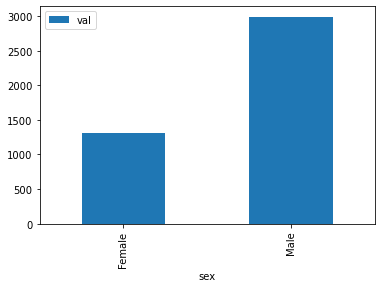

In [31]:
gender.plot(x="sex", y="val", kind="bar")
plt.show()

In [32]:
age = high_violence_yll_demos.groupby(['age'], as_index=False).agg({'val':'mean'})

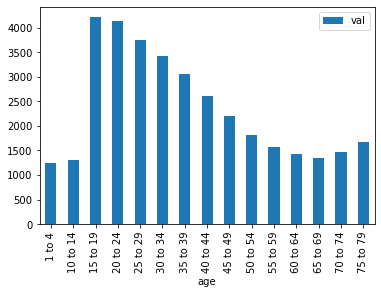

In [33]:
age.plot(x="age", y="val", kind="bar")
plt.show()

In [34]:
high_violence_location_demos = high_violence_yll_demos.groupby(['location', 'year'], as_index=False).agg({'year': 'count', 'val':'mean'})
high_violence_location_demos.head(20)
#38 demos in each region (for one year)

,location,year,val
0,Acre,9,3745.024059
1,Acre,9,3671.885433
2,Acre,9,4023.812749
3,Acre,9,4074.470042
4,Acre,9,4222.955032
5,Acre,9,4415.349049
6,Acre,9,5428.304130
7,Acre,9,5908.498307
8,Acre,9,4988.887961
9,Acre,9,4835.154438


In [35]:
location_by_year_frequency = high_violence_location_demos.groupby('location').count()
location_by_year_frequency['val'].describe()

count    140.000000
mean       9.671429
std        1.406270
min        1.000000
25%       10.000000
50%       10.000000
75%       10.000000
max       10.000000
Name: val, dtype: float64

In [36]:
location_by_year_frequency

,year,val
location,,
Acre,10,10
Aguascalientes,9,9
Alabama,10,10
Alagoas,10,10
Alaska,7,7
...,...,...
Virginia,10,10
Wajir,10,10
West Virginia,1,1


### Take high_violence_ylls_demos and filter on the consistent demographs

In [37]:
high_violence_yll_demos.groupby('country').count()['val']

country
America       842
Brazil       2481
Indonesia      20
Kenya        3562
Mexico       2811
Name: val, dtype: int64

In [38]:
location_filter = high_violence_yll_demos.groupby('location', as_index=False).count()
location_filter = location_filter[['location', 'val']]
location_filter

,location,val
0,Acre,90
1,Aguascalientes,27
2,Alabama,52
3,Alagoas,118
4,Alaska,8
...,...,...
135,Virginia,10
136,Wajir,111
137,West Virginia,1
138,WestPokot,69


In [39]:
gender_filter = high_violence_yll_demos.groupby('sex', as_index=False).count()
gender_filter = gender_filter[['sex', 'val']]
gender_filter

,sex,val
0,Female,113
1,Male,9603


In [40]:
age_filter = high_violence_yll_demos.groupby('age', as_index=False).count()
age_filter = age_filter[['age', 'val']]
age_filter

,age,val
0,1 to 4,4
1,10 to 14,38
2,15 to 19,822
3,20 to 24,1386
4,25 to 29,1300
5,30 to 34,1113
6,35 to 39,1007
7,40 to 44,917
8,45 to 49,814
9,50 to 54,875


In [41]:
#we campare number of demographs (using deaths) vs the total number of demographs that have a higher iv homicide rate than 
#overall overall average.
newdf = df[df['measure'].str.contains("Deaths")]
print("Total number of sub groups: ", len(newdf))
print("Number of sub groups with higher violence death rate than diabetes death rate: ", len(high_violence_death_rate_demos))

Total number of sub groups:  299440
Number of sub groups with higher violence death rate than diabetes death rate:  1827


In [42]:
#we campare number of demographs (using ylls) vs the total number of demographs that have a higher iv homicide rate than 
#overall overall average.
newdf = df[df['measure'].str.contains("YLL")]
print("Total number of sub groups: ", len(newdf))
print("Number of sub groups with higher violence death rate than diabetes YLL rate: ", len(high_violence_yll_demos))

Total number of sub groups:  299440
Number of sub groups with higher violence death rate than diabetes YLL rate:  9716


### Create table that lets us compare high homicde demographs to their corresponding diabetes yll rates

In [43]:
diabetes_ylls = df[df['measure'].str.contains('YLL') &
             df['cause'].str.contains('Diabetes')]

In [44]:
#create a new df using multiindex to combine the high homicide demographs with their corresponding diabetes deaths
#This cell get the diabetes rows
diabetes_ylls = diabetes_ylls[diabetes_ylls.set_index(['country','location', 'sex', 'age', 'year']).index.isin(high_violence_yll_demos.set_index(['country', 'location', 'sex', 'age', 'year']).index)]
diabetes_ylls.shape

(9716, 9)

In [45]:
#combine the tables 
higher_violence_ylls_with_diabetes = diabetes_ylls.append(high_violence_yll_demos)
higher_violence_ylls_with_diabetes = higher_violence_ylls_with_diabetes.sort_values(by=['location', 'sex', 'age', 'year'])
higher_violence_ylls_with_diabetes.head(40)

,country,measure,location,sex,age_sort,age,cause,year,val
456348,Brazil,YLLs (Years of Life Lost),Acre,Male,2,15 to 19,Diabetes mellitus,2010,36.295712
456386,Brazil,YLLs (Years of Life Lost),Acre,Male,2,15 to 19,Interpersonal violence,2010,5625.088880
458735,Brazil,YLLs (Years of Life Lost),Acre,Male,2,15 to 19,Diabetes mellitus,2011,37.459295
458773,Brazil,YLLs (Years of Life Lost),Acre,Male,2,15 to 19,Interpersonal violence,2011,5311.182626
460978,Brazil,YLLs (Years of Life Lost),Acre,Male,2,15 to 19,Diabetes mellitus,2012,32.618349
461016,Brazil,YLLs (Years of Life Lost),Acre,Male,2,15 to 19,Interpersonal violence,2012,5644.124860
464310,Brazil,YLLs (Years of Life Lost),Acre,Male,2,15 to 19,Diabetes mellitus,2013,32.968004
464348,Brazil,YLLs (Years of Life Lost),Acre,Male,2,15 to 19,Interpersonal violence,2013,5594.900991
467692,Brazil,YLLs (Years of Life Lost),Acre,Male,2,15 to 19,Diabetes mellitus,2014,33.043311
472764,Brazil,YLLs (Years of Life Lost),Acre,Male,2,15 to 19,Interpersonal violence,2014,5783.962561


In [46]:
higher_violence_ylls_with_diabetes.shape

(19432, 9)

# Results

In [47]:
print("Proportion of high violence deaths demographs to all demographs: ", len(high_violence_death_rate_demos)/(len(newdf)))

Proportion of high violence deaths demographs to all demographs:  0.00610138925995191


In [48]:
print("Proportion of high violence YLLs demographs to all demographs: ", len(high_violence_yll_demos)/len(newdf))

Proportion of high violence YLLs demographs to all demographs:  0.032447234838364945


In [49]:
age_filter_vis = high_violence_death_rate_demos.groupby('age').count()
age_filter_vis = age_filter_vis[['val']]
age_filter_vis

,val
age,
15 to 19,193
20 to 24,319
25 to 29,339
30 to 34,310
35 to 39,264
40 to 44,166
45 to 49,94
50 to 54,52
55 to 59,27


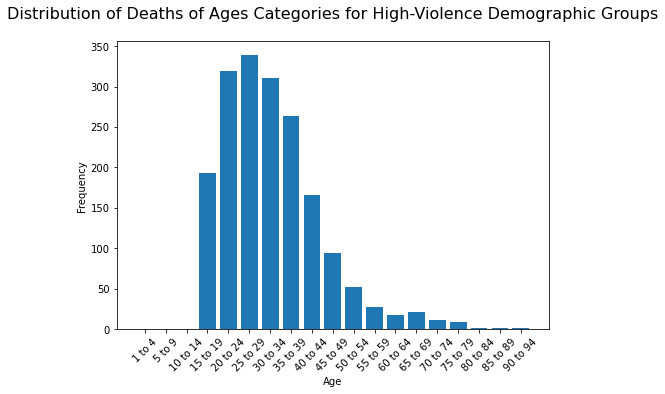

In [50]:
xaxis = df.age.unique().tolist()
yaxis = age_filter_vis['val'].tolist()
yaxis = [0, 0, 0] + yaxis

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(xaxis,yaxis)
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.xlabel('Age')
fig.suptitle("Distribution of Deaths of Ages Categories for High-Violence Demographic Groups", fontsize=16, y=1.12)
plt.show()

In [51]:
age_filter_vis = high_violence_yll_demos.groupby('age').count()
age_filter_vis = age_filter_vis[['val']]
age_filter_vis

,val
age,
1 to 4,4
10 to 14,38
15 to 19,822
20 to 24,1386
25 to 29,1300
30 to 34,1113
35 to 39,1007
40 to 44,917
45 to 49,814


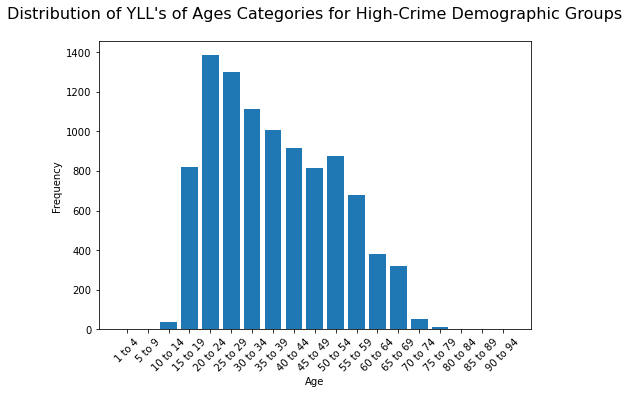

In [52]:
xaxis = df.age.unique().tolist()
yaxis = age_filter_vis['val'].tolist()
yaxis.insert(1,0)
yaxis = yaxis + [0, 0, 0]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(xaxis,yaxis)
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.xlabel('Age')
fig.suptitle("Distribution of YLL's of Ages Categories for High-Crime Demographic Groups", fontsize=16, y=1.12)
plt.show()

In [53]:
df.columns

Index(['country', 'measure', 'location', 'sex', 'age_sort', 'age', 'cause',
       'year', 'val'],
      dtype='object')

In [54]:
newdf = high_violence_yll_demos[['age', 'val']].copy()
newdf

,age,val
457692,20 to 24,25988.701482
456172,20 to 24,25201.052071
460808,20 to 24,23908.504374
467998,20 to 24,23288.249545
684656,20 to 24,22461.918139
...,...,...
493602,55 to 59,1085.958098
765182,55 to 59,1085.942674
649285,40 to 44,1085.916149
671974,60 to 64,1085.829031


array([[<AxesSubplot:title={'center':'val'}>]], dtype=object)

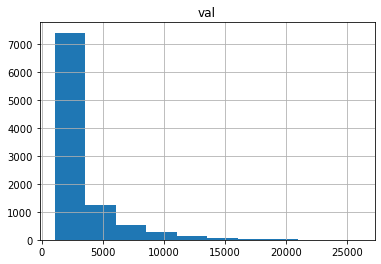

In [55]:
newdf.hist()

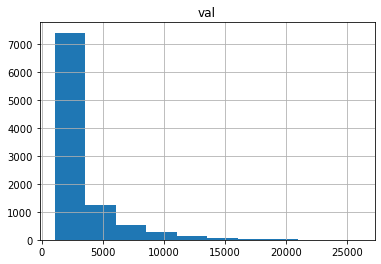

In [56]:
high_violence_yll_demos.hist(column=['val', 'age'])
plt.show()